# Training Model1 for counting shapes in binary images

## Circular shapes with the same radii

This notebook trains a CNN model for the Counting simple shapes (circles, squares or diamonds) experiment, more specifically circle shapes with the same radius. The 'CNNcount' code is in a [git repository](https://github.com/NLeSC/XAI/tree/master/Software/CNNcountDemo).

### Settings

In [1]:
# Imports
import warnings
warnings.simplefilter('ignore')

import numpy as np
from numpy import load
import os.path
import matplotlib.pyplot as plt

import keras.backend as K
if(K.tensorflow_backend):
    import tensorflow as tf
    tf.logging.set_verbosity(tf.logging.ERROR)
from keras.utils import np_utils
from keras.models import load_model

from CNNcount import shape_images as si
from CNNcount import model_count_shapes as mcs

Using TensorFlow backend.


### Loading of pre-generated data and formatting of the data and labels.

In [2]:
# filename for loading the data from the NPZ files (NumPy compressed)
same_shape_same_radius_fname = "/home/elena/eStep/XAI/Data/CountingShapes/circles_same_radius_60k.npz"
# input image dimensions and number of classes
img_rows, img_cols = 64, 64
num_classes = 3

#### Data formatting

The file containing images of the same shape (circle) with same radius already exist!
Size of training data:  (42000, 64, 64, 1) and labels:  (42000,)
Size of validation data:  (12000, 64, 64, 1) and labels:  (12000,)


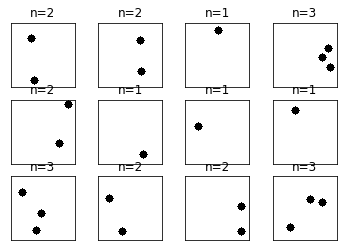

In [3]:
# load the set of NIM images with the same type and same radius and split to train and validaiton subsets
if os.path.isfile(same_shape_same_radius_fname): # already generated- just load
    print ("The file containing images of the same shape (circle) with same radius already exist!")
    # load from NPZ file for display
    images_train, images_val, _, labels_train, labels_val, _ = \
                                                                si.load_split_data(same_shape_same_radius_fname)
    
    
    if K.image_data_format() == 'channels_first':
        images_train = images_train.reshape(images_train.shape[0], 1, img_rows, img_cols)
        images_val = images_val.reshape(images_val.shape[0], 1, img_rows, img_cols)
        input_shape = (1, img_rows, img_cols)
    else:
        input_shape = (img_rows, img_cols, 1)
    print("Size of training data: ", np.shape(images_train), "and labels: ", np.shape(labels_train))
    print("Size of validation data: ", np.shape(images_val), "and labels: ", np.shape(labels_val))
else: # missing data
    print ("The file containing images of the same shape (circle) with same radius does not exist!")
    print("Use the GenerateShapeImages notebook to generate the experimental data.") 
    
# plot random 12 of the train images
si.plot_12images(images_train, labels_train)    

#### Labels formatting.

In [4]:
# convert class vectors to binary class matrices
labels_train = np_utils.to_categorical(labels_train-1, num_classes=None)
labels_val = np_utils.to_categorical(labels_val-1, num_classes=None)
print(labels_train)
print('labels_train shape:', labels_train.shape)
print('labels_val shape:', labels_val.shape)

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]
labels_train shape: (42000, 3)
labels_val shape: (12000, 3)


#### CNN model.

In [5]:
# parameters of the training
batch_size = 200
epochs = 3

In [6]:
# generate the model
model = mcs.generate_cnncount_model(input_shape, num_classes)

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_layer1 (Conv2D)       (None, 62, 62, 32)        320       
_________________________________________________________________
conv2d_layer2 (Conv2D)       (None, 60, 60, 64)        18496     
_________________________________________________________________
maxpooling2d_layer1 (MaxPool (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_layer1 (Dropout)     (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_layer1 (Flatten)     (None, 57600)             0         
_________________________________________________________________
dense_layer1 (Dense)         (None, 128)               7372928   
_________________________________________________________________
dropout_layer2 (Dropout)     (None, 128)               0         
__________

In [7]:
# train 
mcs.train_cnncount_model(model, images_train, labels_train,images_val, labels_val, batch_size, epochs)


Train on 42000 samples, validate on 12000 samples
Epoch 1/3
42000/42000 [==============================] - 362s 9ms/step - loss: 0.6017 - acc: 0.7521 - val_loss: 0.0239 - val_acc: 1.0000
Epoch 2/3
42000/42000 [==============================] - 374s 9ms/step - loss: 0.0380 - acc: 0.9929 - val_loss: 2.8412 - val_acc: 0.3668
Epoch 3/3
42000/42000 [==============================] - 373s 9ms/step - loss: 0.0219 - acc: 0.9964 - val_loss: 2.1559e-04 - val_acc: 1.0000


#### Save the model

In [8]:
# filename for model saving
same_shape_same_radius_model_fname = "/home/elena/eStep/XAI/Data/CountingShapes/model_circles_same_radius.h5"

In [9]:
# save the trained model
model.save(same_shape_same_radius_model_fname)
print("Saved model to disk")


Saved model to disk
